<a href="https://colab.research.google.com/github/Swamyrajgk/Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chennai House Price Prediction

Problem Statement
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

Data
The historical sale data is available here.

Minimum Requirements
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate. **bold text**

DATASET LINK=https://docs.google.com/document/d/1R_fqWoLPTUJDuktxU55KKfuiBZyQMfn53sEyImq6gJY/edit

**Importing all necessary modules and checking the data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [47]:
#import dataset
df=pd.read_csv('/content/train-chennai-sale.csv')

In [3]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df.shape

(7109, 22)

In [5]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [7]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [8]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


**INITIAL OBSERVATIONS ON DATASET:**
1. TOTAL NO OF ROWS AND COLUMNS : 7109, 22
2. THREE COLUMNS HAVE NAN VALUES 'QS_OVERALL', N BATHROOM and N BEDROOM
3. FOUR COLUMNS ARE NOT REQUIRED FOR CREATING ML MODEL.THEY ARE "PRT ID", "QS ROOMS", "QS BATHROOM", "QS BEDROOM," and "QS OVERALL"QS ROOMS OTHER THREE COLUMNS ARE NOT REQUIRED
4. REG FEE & COMMIS ARE UNNECESSARY BECAUSE THEY HAVE NO IMPACT ON SALES BEFOREHAND. SO WE CAN DROP THESE COLUMNS.
5. FEW COLUMNS ARE NOT IN THE CORRECT DATATYPE 

## **DATA CLEANING:**

**First looking for Null or NAN values in Dataset:**

In [9]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

**In this dataset, N BATHROOM has 5 and N BEDROOM has 1 Nan values, respectively, and QS OVERALL has a total of 48 Nan (This can be ignored as we are going to drop this column).**

In [53]:
# Either we discard it or we fill a value with mode.
df["N_BEDROOM"].fillna(df["N_BEDROOM"].mode()[0], inplace=True)

In [54]:
df.N_BATHROOM.dtype
df.N_BEDROOM.dtype

dtype('float64')

In [55]:
# Similarly for N_Bathroom
df["N_BATHROOM"].fillna(df["N_BATHROOM"].mode()[0], inplace=True)

**Although they are in a FLOAT DATATYPE, N BATHROOM & N BEDROOM SHOULD BOTH BE IN INTEGER. A CHANGE IN DATATYPE IS NECESSARY**

In [56]:
# Changing DATA TYPE to 'int'
df["N_BEDROOM"]=df["N_BEDROOM"].astype("int")
df["N_BATHROOM"]=df["N_BATHROOM"].astype("int")

**A conclusion that can be drawn from the dataset is that the columns "PRT ID," "QS ROOMS," "QS BATHROOM," "QS BEDROOM,", "QS OVERALL", "REG FEE" & "COMMIS" are not necessary for building the machine learning model, and it is also ineffective.**

In [48]:
#dropping the unneccesary columns
df.drop(columns=['PRT_ID','QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', "REG_FEE", "COMMIS"],inplace=True)

In [49]:
df.shape

(7109, 15)

In [50]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE'],
      dtype='object')

In [57]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
SALES_PRICE      0
dtype: int64

**Null values and unnecessary columns have been removed from dataset.**

> Indented block

> Indented block

> Indented block







**# COLUMN BY COLUMN DATA CLEANING**

**1. AREA**

In [80]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

There are more duplicates in this column as a result of spelling errors. Use the REPLACE function to make the necessary corrections.

In [81]:
#replacing duplicates
place_duplicates={'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','Karapakam':'Karapakkam','Adyr':'Adyar','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar',
          'Velchery':'Velachery','KKNagar':'KK Nagar','TNagar':'T Nagar'}
df['AREA']=df['AREA'].replace(place_duplicates)

In [82]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [83]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

2. **N_BEDROOM & 3. N_BATHROOM**

In [84]:
df.N_BEDROOM.value_counts()


1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64

In [85]:
df.N_BATHROOM.value_counts()

1    5594
2    1515
Name: N_BATHROOM, dtype: int64

**4. SALE_COND Column**

In [86]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [87]:
#replacing duplicates
df=df.replace(to_replace=['Ab Normal'],value='AbNormal')
df=df.replace(to_replace=['Partiall','PartiaLl'],value='Partial')
df=df.replace(to_replace=['AdjLand'],value='Adj Land')

In [88]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

In [89]:
df.SALE_COND.value_counts()

Adj Land       1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

**5. PARK_FACIL**

In [90]:
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [91]:
df=df.replace(to_replace=['Noo'],value='No')

In [92]:
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [93]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

**6.BUILDTYPE**

In [94]:
#finding the unique elements of the column
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [95]:
building={'Comercial':'Commercial','Other':'Others'}
df['BUILDTYPE']=df['BUILDTYPE'].replace(building)

In [96]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [97]:
df.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

**7. UTILITY_AVAIL:**

In [98]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [99]:
df["UTILITY_AVAIL"] = df["UTILITY_AVAIL"].replace({"All Pub": "AllPub", "NoSewr " : "NoSewr"})

In [100]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [101]:
df.UTILITY_AVAIL.value_counts()

AllPub    1887
NoSeWa    1871
NoSewr    1829
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

**8. STREET:**

In [102]:
#finding the unique elements of the column
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [103]:
#replacing duplicates
stree={'Pavd':'Paved','NoAccess':'No Access'}
df['STREET']=df['STREET'].replace(stree)

In [104]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [105]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

**9. MZZONE**

In [106]:
#finding the unique elements of the column
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [107]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [108]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'SALES_PRICE', 'AGE_OF_BUILDING'],
      dtype='object')

**10.N_ROOM**

In [109]:
df.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

**11. DATE_SALE  & 12. DATE_BUILD**

In [60]:
df.DATE_SALE.dtype
df.DATE_BUILD.dtype

dtype('O')

In [61]:
#converting these two columns' object datatypes to date/time formats
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])
df.DATE_BUILD.dtype

dtype('<M8[ns]')

In [62]:
df["DATE_SALE"][0]

Timestamp('2011-04-05 00:00:00')

In [63]:
df.head(5)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,7600000
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,21717770
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,13159200
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,9630290
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,7406250


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   int64         
 5   N_BATHROOM     7109 non-null   int64         
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  SALES_PRICE    7109 non-null   int64         
dtypes: datetime64[ns](2),

**Our data is now clean. There are no nan values or unnecessary columns.**

# **FEATURE ENGINEERING:**

**We can determine the age of a house using these two columns DATE_SALE & DATE_BUILD. So,  I'm creating a new column called "AGE OF BUILDING."**

In [66]:
df['AGE_OF_BUILDING']=(df['DATE_SALE']-df['DATE_BUILD'])/np.timedelta64(1,'Y')
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILDING
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,7600000,43.891387
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,21717770,10.992697
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,13159200,19.581511
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,9630290,21.985393
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,7406250,29.574871


In [67]:
#Changing the datatype of the age from the float to int
df['AGE_OF_BUILDING']=df['AGE_OF_BUILDING'].astype('int')

In [68]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILDING
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,7600000,43
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,21717770,10
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,13159200,19
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,9630290,21
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,7406250,29


We no longer require the DATE SALE and DATE BUILD columns.

In [118]:
df=df.drop(["DATE_SALE", "DATE_BUILD"], axis=1)

In [117]:
# Now our data is ready for modelling.
df.to_csv('cleaned_data_chp ')

**CHECKING OUTLIERS:**

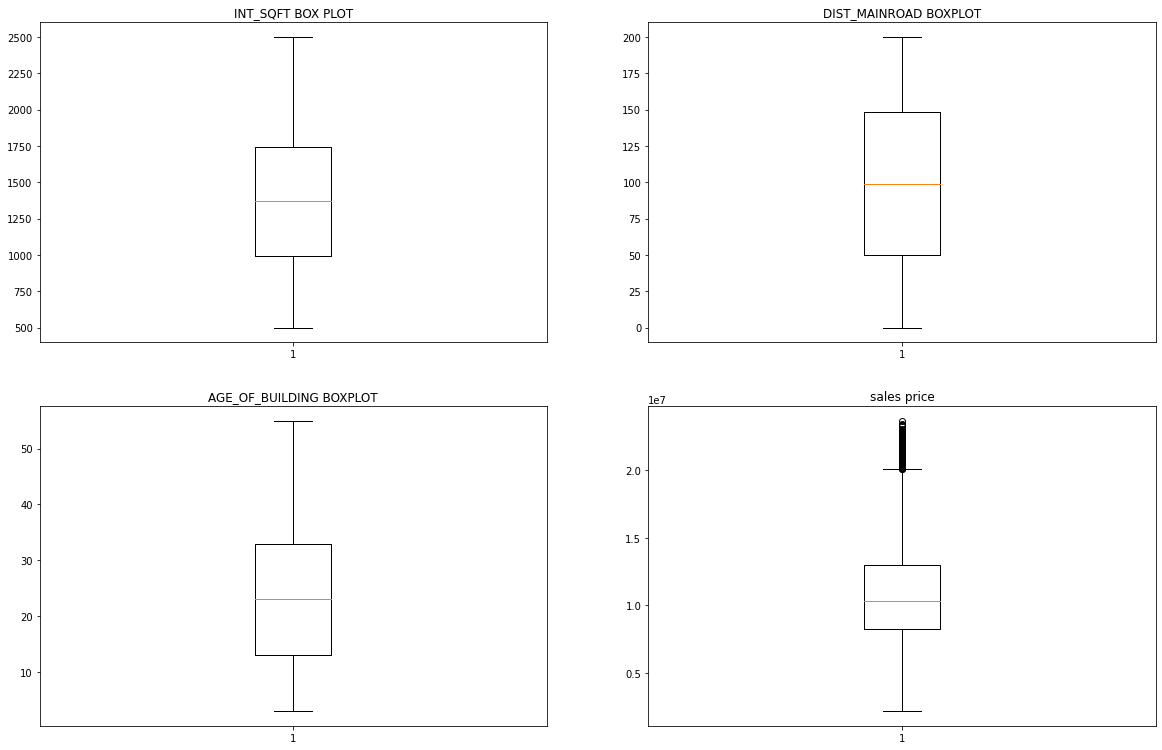

In [110]:
plt.figure(figsize=(20,20))
plt.subplot(321)
plt.boxplot(df["INT_SQFT"])
plt.title("INT_SQFT BOX PLOT")

plt.subplot(322)
plt.boxplot(df["DIST_MAINROAD"])
plt.title("DIST_MAINROAD BOXPLOT")

plt.subplot(323)
plt.boxplot(df["AGE_OF_BUILDING"])
plt.title("AGE_OF_BUILDING BOXPLOT")

plt.subplot(324)
plt.boxplot(df["SALES_PRICE"])
plt.title("sales price")
plt.show()



In [111]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALES_PRICE,AGE_OF_BUILDING
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,1.089491e+07,23.550710
std,457.410902,57.403110,0.802881,0.409534,1.019099,3.768603e+06,12.435546
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.156875e+06,3.000000
25%,993.000000,50.000000,1.000000,1.000000,3.000000,8.272100e+06,13.000000
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,1.033505e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,1.299390e+07,33.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,2.366734e+07,55.000000


In [112]:
df["SALES_PRICE"].max()


23667340

In [113]:
df.SALES_PRICE.mean()

10894909.63918976

In [115]:
df.to_csv('guvi_app')

**OBSERVATIONS:**
1. There are no outliers in INT_SQFT, DIST_MAINROAD, AGE_OF_BUILDING COLUMNS.
2. There is outliers in Sales price. But it is valid outliers.

# **EXPLORATARY DATA ANALYSIS:**

In [119]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILDING
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000,43
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770,10
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200,19
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,9630290,21
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,7406250,29


In [120]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'SALES_PRICE', 'AGE_OF_BUILDING'],
      dtype='object')

**Initial Observations:**
Our data has totally 4 continous variable data and rest all others are categorical data.

Text(0.5, 1.0, 'Area Wise Sales')

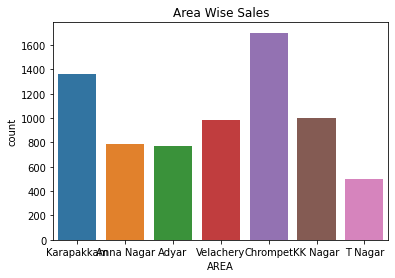

In [121]:
sns.countplot(data=df,x='AREA')
plt.title('Area Wise Sales')

OBSERVATIONS:
MOST NO.OF.SALES AREA WISE:
1. CHROMPET
2. KARAPAKKAM
3. KK NAGAR
4. VELACHERY
5. ANNA NAGAR
6. ADAYAR
7. T NAGAR

Text(0.5, 1.0, 'Sales Condition')

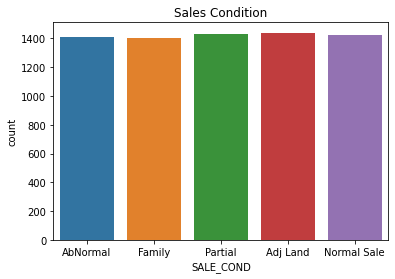

In [122]:
sns.countplot(data=df,x='SALE_COND')
plt.title('Sales Condition')

Text(0.5, 1.0, 'Parking Facility')

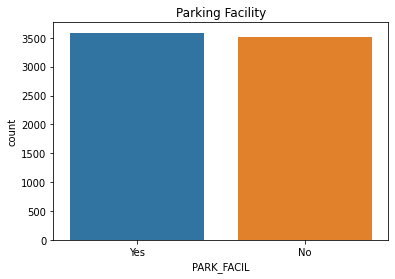

In [123]:
sns.countplot(data=df,x='PARK_FACIL')
plt.title('Parking Facility')

Text(0.5, 1.0, 'Type of Building')

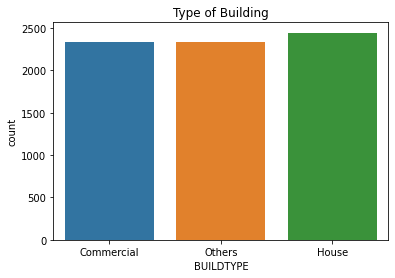

In [124]:
sns.countplot(data=df,x='BUILDTYPE')
plt.title('Type of Building')

Text(0.5, 1.0, 'Utility Available')

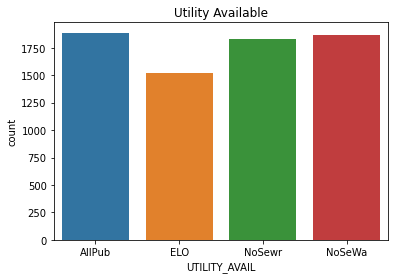

In [125]:
sns.countplot(data=df,x='UTILITY_AVAIL')
plt.title('Utility Available')

Text(0.5, 1.0, 'Street Type')

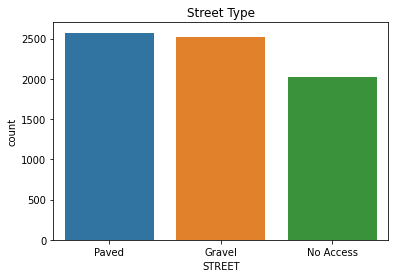

In [126]:
sns.countplot(data=df,x='STREET')
plt.title('Street Type')

Text(0.5, 1.0, 'Zones of Chennai')

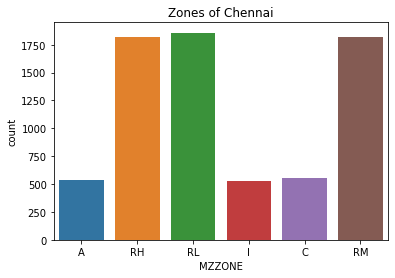

In [127]:
sns.countplot(data=df,x='MZZONE')
plt.title('Zones of Chennai')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'No of Bedrooms')

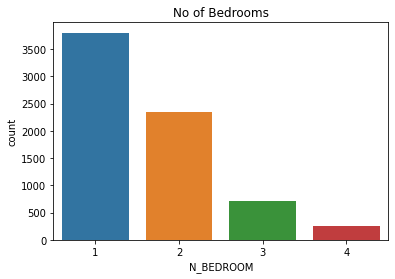

In [128]:
sns.countplot(df['N_BEDROOM'])
plt.title('No of Bedrooms')

SINGLE BED ROOM HOUSES GOT SOLD MORE. AS NO.OF BEDROOM INCRESES TOTAL NO.OF HOUSES SOLD DECRESES

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'N_BATHROOM')

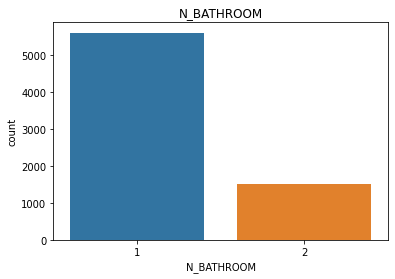

In [129]:
sns.countplot(df['N_BATHROOM'])
plt.title('N_BATHROOM')

**CONTINOUS DATA FEATURES:**

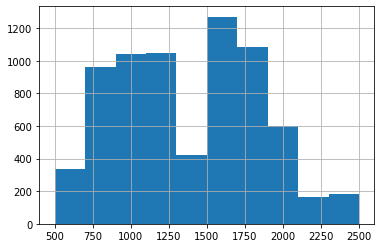

In [130]:
df.INT_SQFT.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Area in Squarefeet')

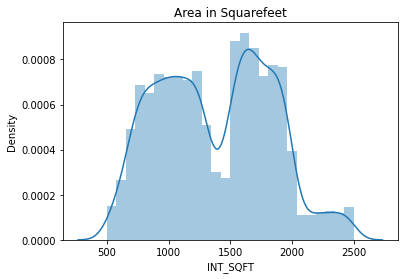

In [131]:
sns.distplot(df['INT_SQFT'])
plt.title('Area in Squarefeet')

**OBSERVATIONS:**
1. DOES NOT FOLLOW THE NORMAL DISTRIBUTION
2. NOT EFFECTIVELY SKEWED

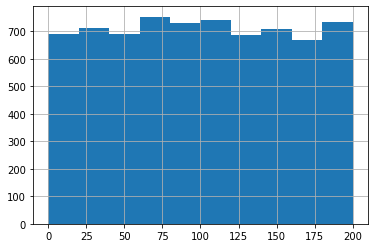

In [132]:
df.DIST_MAINROAD.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distance from Mainroad(in meters)')

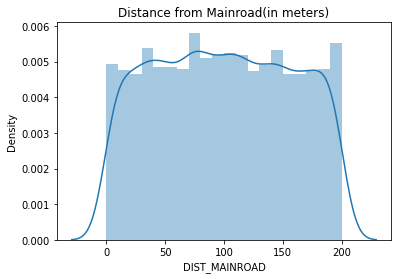

In [133]:
sns.distplot(df['DIST_MAINROAD'])
plt.title('Distance from Mainroad(in meters)')

**OBSERVATIONS:**
1. FOLLOWS UNIFORM DISTRIBUTION
2. NO SKEW

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'SALES PRICE')

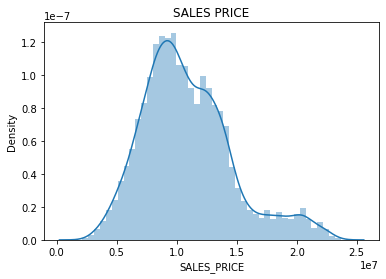

In [134]:
sns.distplot(df['SALES_PRICE'])
plt.title('SALES PRICE')

**OBSERVATIONS:**

1. LIKELY TO FOLLOW NORMAL DISTRIBUTION
2. RIGHT SKEWED

**CONTINOUS DATA FEATURE VS TARGET('SALES_PRICE'):**

Text(0.5, 1.0, 'AGE_OF_BUILDING vs SALES_PRICE')

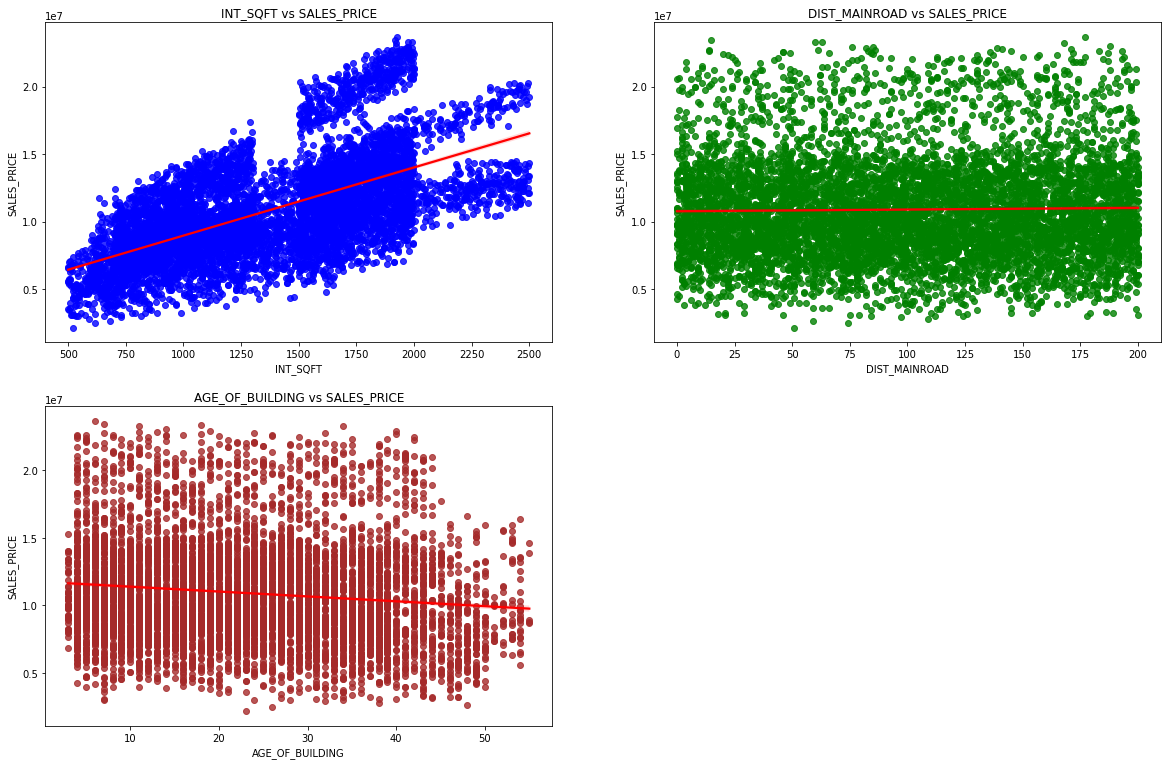

In [135]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.regplot(x = df["INT_SQFT"], y =df["SALES_PRICE"], scatter_kws={"color" : "blue"}, line_kws={"color":"red"})
plt.title("INT_SQFT vs SALES_PRICE")

plt.subplot(322)
sns.regplot(x = df["DIST_MAINROAD"], y =df["SALES_PRICE"], scatter_kws={"color" : "green"}, line_kws={"color":"red"})
plt.title("DIST_MAINROAD vs SALES_PRICE")

plt.subplot(323)
sns.regplot(x = df["AGE_OF_BUILDING"], y =df["SALES_PRICE"], scatter_kws={"color" : "brown"}, line_kws={"color":"red"})
plt.title("AGE_OF_BUILDING vs SALES_PRICE")

**OBSERVATIONS:**
1. As INT SQFT increases, TOTAL SALE PRICE also increses.
2. The distance from the main road has no impact on the TOTAL SALE PRICE.
3. Age of the building has a slight effect on the total sale price. As age increses sales price decreses.

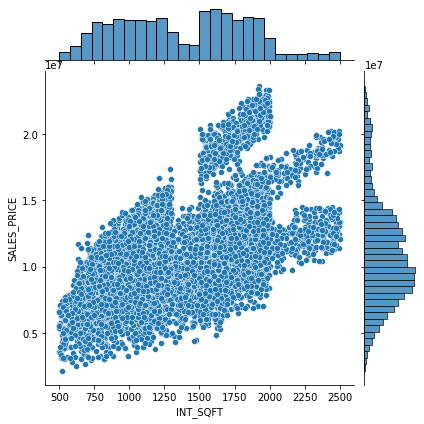

In [136]:
sns.jointplot(x='INT_SQFT',y='SALES_PRICE',data=df)

plt.savefig("jp1")

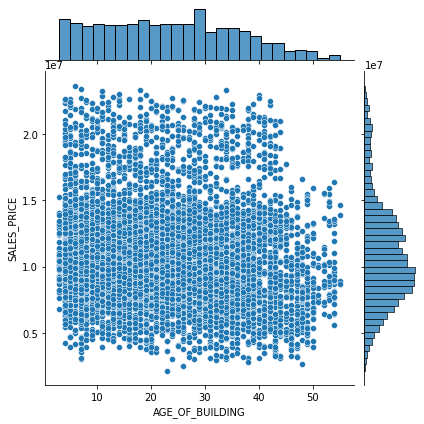

In [137]:
sns.jointplot(x='AGE_OF_BUILDING',y='SALES_PRICE',data=df)


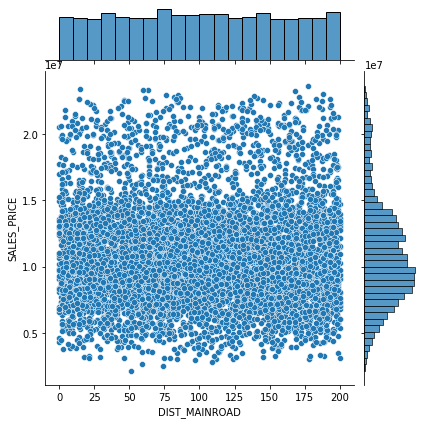

In [138]:
sns.jointplot(x='DIST_MAINROAD',y='SALES_PRICE',data=df)


**CATEGORICAL DATA FEATURE VS TARGET('SALES_PRICE'):**

In [139]:
temp =pd.DataFrame(df.groupby('AREA')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['AREA']=temp.index
AREA_values = temp.AREA.unique()
px.bar(temp,x='AREA',y='SALES_PRICE',color='SALES_PRICE')

Text(0.5, 1.0, 'AREA vs SALES_PRICE')

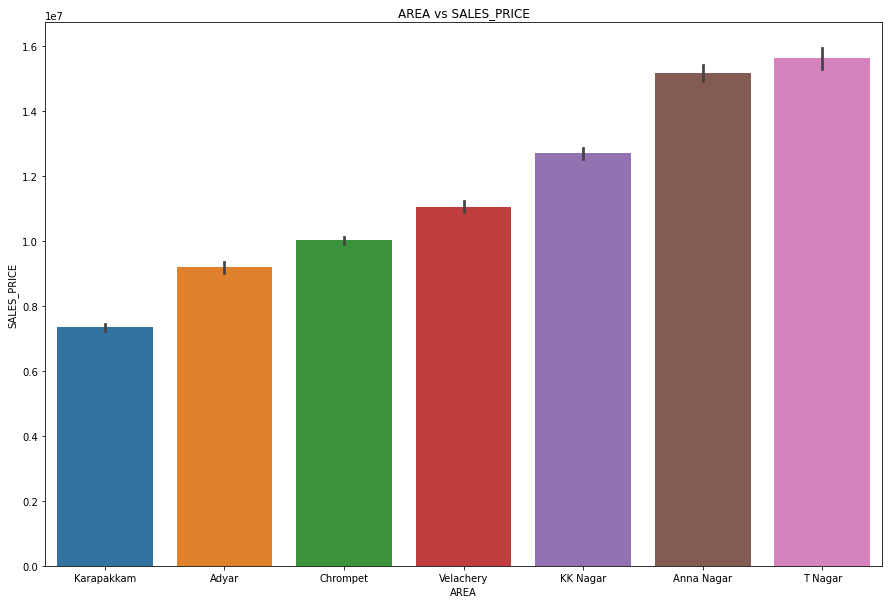

In [140]:
plt.figure(figsize=(15,10))
sns.barplot(x=df.AREA,y=df.SALES_PRICE,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('AREA vs SALES_PRICE')

From the above plot it is evident that there is a linear relationship between the Area and Target.

Text(0.5, 1.0, 'SALE_COND vs SALES_PRICE')

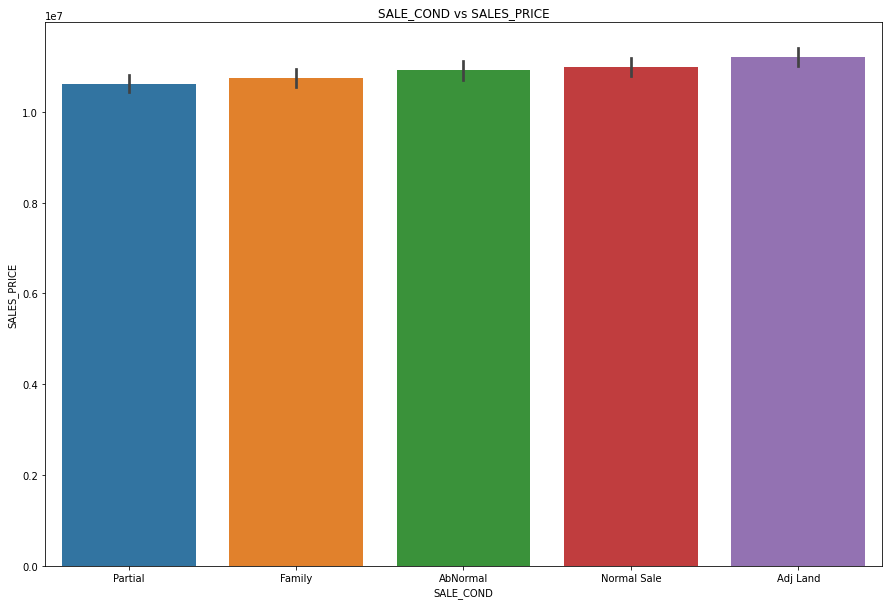

In [141]:
plt.figure(figsize=(15,10))
sns.barplot(x=df.SALE_COND,y=df.SALES_PRICE,order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('SALE_COND vs SALES_PRICE')

There is slight linear relationship between the feature and target.

Text(0.5, 1.0, 'N_BEDROOM vs SALES_PRICE')

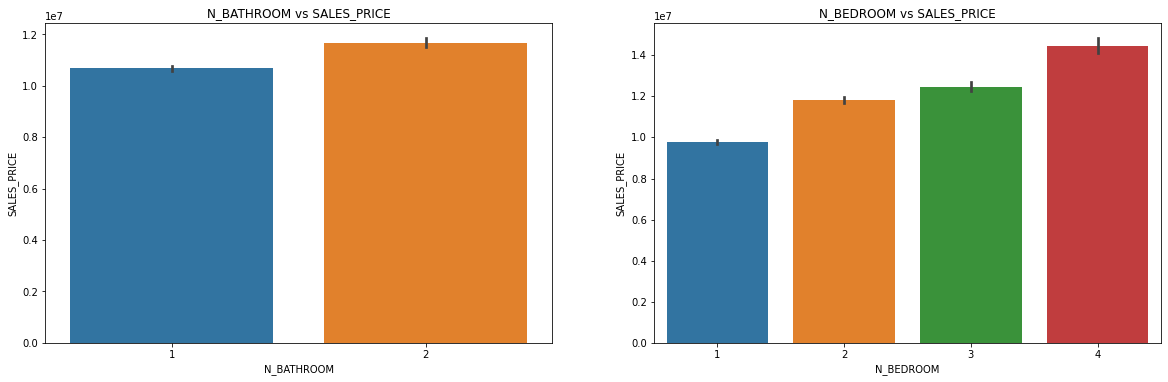

In [142]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.barplot(x=df.N_BATHROOM,y=df.SALES_PRICE,order=df.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM'])
plt.title('N_BATHROOM vs SALES_PRICE')

plt.subplot(322)
sns.barplot(x=df.N_BEDROOM,y=df.SALES_PRICE,order=df.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM'])
plt.title('N_BEDROOM vs SALES_PRICE')

***From the above plot it is evident that there is a linear relationship between the N_BEDROOM,N_BATHROOM and Target.***

Text(0.5, 1.0, 'PARK_FACIL vs SALES_PRICE')

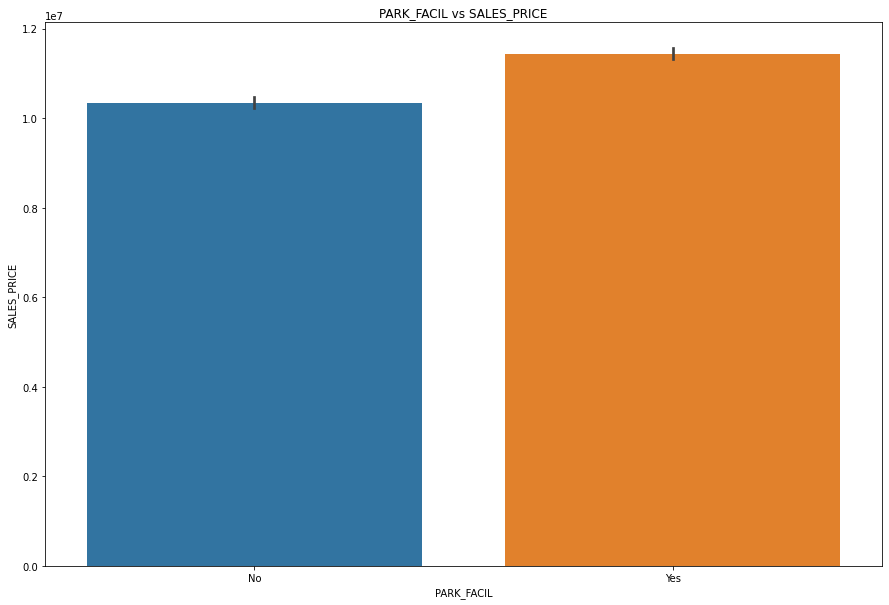

In [143]:
plt.figure(figsize=(15,10))
sns.barplot(x=df.PARK_FACIL,y=df.SALES_PRICE,order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title('PARK_FACIL vs SALES_PRICE')

From the above plot, it is clear that, houses with parking facility sold for higher prices.

Text(0.5, 1.0, 'BUILDTYPE vs SALES_PRICE')

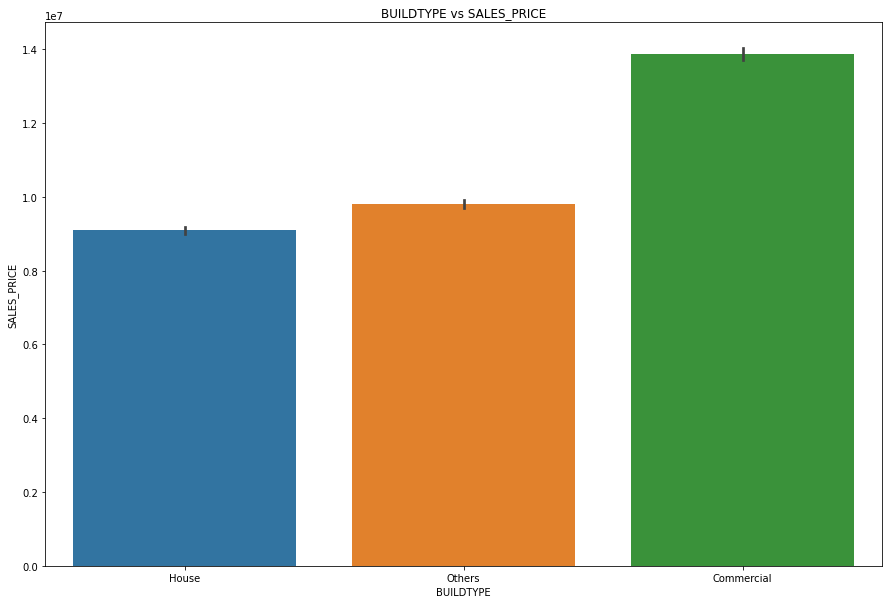

In [144]:
plt.figure(figsize=(15,10))
sns.barplot(x=df.BUILDTYPE,y=df.SALES_PRICE, order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('BUILDTYPE vs SALES_PRICE')

There is no linear relationship between this feature and target. 

Text(0.5, 1.0, 'STREET vs SALES_PRICE')

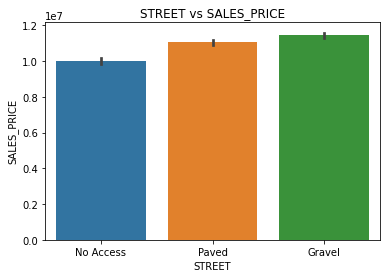

In [145]:
sns.barplot(x=df.STREET,y=df.SALES_PRICE,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('STREET vs SALES_PRICE')

There is linear relationship between the feature and target.

Text(0.5, 1.0, 'MZZONE vs SALES_PRICE')

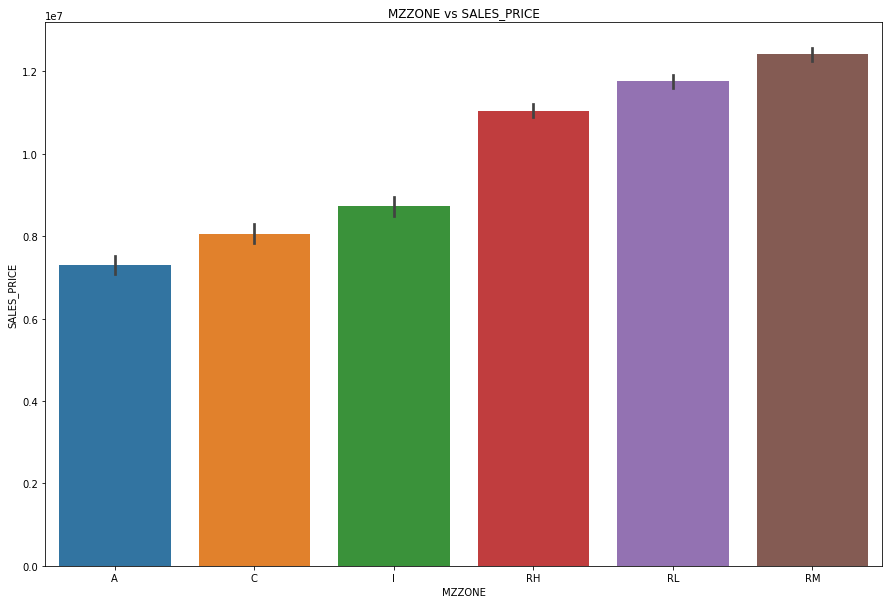

In [146]:
plt.figure(figsize=(15,10))
sns.barplot(x=df.MZZONE,y=df.SALES_PRICE,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('MZZONE vs SALES_PRICE')

There is linear relationship between the feature and target.

Text(0.5, 1.0, 'N_ROOM vs SALES_PRICE')

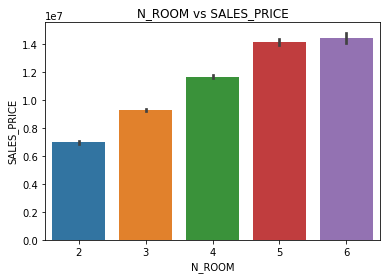

In [147]:
sns.barplot(x=df.N_ROOM,y=df.SALES_PRICE,order=df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'])
plt.title('N_ROOM vs SALES_PRICE')

There is linear relationship between the feature and target.

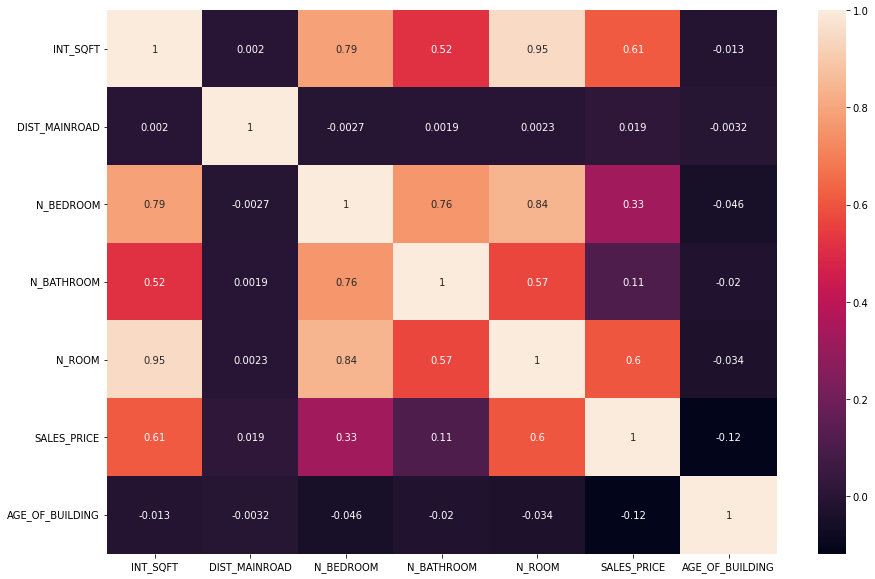

In [148]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

**OVERALL OBSERVATIONS:**

1. There is a linear relationship between Area, MZ Zone, N ROOM, N BEDROOM, N BATHROOM, STREET,SALE COND and TOTAL SALE PRICE.
2. For AREA, STREET, MZ ZONE, and SALE COND, we apply ordinal label encoding.
3. Although there is no linear relationship, BUILDTYPE does impact SALE PRICE. Therefore, for this column, we choose one hot encoding.
4. There is a linear relationship between UTILITY AVAIL and STREET and TOTAL SALE PRICE. but, having less of an impact than other features.

# **ENCODING:**

**ORDINAL LABEL ENCODING:**

> For AREA, SALE COND,UTILITY_AVAIL,STREET AND MZ ZONE, we apply ordinal label encoding.



In [149]:
df1=df

In [150]:
df

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILDING
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000,43
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770,10
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200,19
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,9630290,21
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,7406250,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,Adj Land,No,Others,ELO,No Access,RM,5353000,49
7105,Velachery,1897,52,3,2,5,Family,Yes,Others,NoSeWa,No Access,RH,10818480,8
7106,Velachery,1614,152,2,1,4,Normal Sale,No,House,NoSeWa,Gravel,I,8351410,28
7107,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,8507000,31


In [151]:
df1

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILDING
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000,43
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770,10
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200,19
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,9630290,21
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,7406250,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,Adj Land,No,Others,ELO,No Access,RM,5353000,49
7105,Velachery,1897,52,3,2,5,Family,Yes,Others,NoSeWa,No Access,RH,10818480,8
7106,Velachery,1614,152,2,1,4,Normal Sale,No,House,NoSeWa,Gravel,I,8351410,28
7107,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,8507000,31


In [152]:
df1["AREA"] = df1["AREA"].replace({"Karapakkam": 0,"Adyar": 1, "T Nagar": 6, "Chrompet": 2, "Velachery": 3, "Anna Nagar" : 5,"KK Nagar" : 4})

df1["SALE_COND"] = df1["SALE_COND"].replace({"Partial": 0,"Family": 1,"AbNormal": 2, "Normal Sale": 3,"Adj Land" : 4})

df1["UTILITY_AVAIL"] = df1["UTILITY_AVAIL"].replace({"ELO": 0, "NoSeWa": 1, "NoSewr" : 2, "AllPub": 3})

df1["STREET"] = df1["STREET"].replace({"No Access": 0,"Paved": 1, "Gravel": 2})

df1["MZZONE"] = df1["MZZONE"].replace({"A": 0,"C": 1, "I": 2, "RH": 3, "RL": 4, "RM" : 5})

In [153]:
df1

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILDING
0,0,1004,131,1,1,3,2,Yes,Commercial,3,1,0,7600000,43
1,5,1986,26,2,1,5,2,No,Commercial,3,2,3,21717770,10
2,1,909,70,1,1,3,2,Yes,Commercial,0,2,4,13159200,19
3,3,1855,14,3,2,5,1,No,Others,2,1,2,9630290,21
4,0,1226,84,1,1,3,2,Yes,Others,3,2,1,7406250,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,51,1,1,2,4,No,Others,0,0,5,5353000,49
7105,3,1897,52,3,2,5,1,Yes,Others,1,0,3,10818480,8
7106,3,1614,152,2,1,4,3,No,House,1,2,2,8351410,28
7107,0,787,40,1,1,2,0,Yes,Commercial,0,1,4,8507000,31


In [154]:
# Label Encoding (Binary Categorical Feature)
df1["PARK_FACIL"] = df1["PARK_FACIL"].replace({"No": 0, "Yes": 1})

In [155]:
df1

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILDING
0,0,1004,131,1,1,3,2,1,Commercial,3,1,0,7600000,43
1,5,1986,26,2,1,5,2,0,Commercial,3,2,3,21717770,10
2,1,909,70,1,1,3,2,1,Commercial,0,2,4,13159200,19
3,3,1855,14,3,2,5,1,0,Others,2,1,2,9630290,21
4,0,1226,84,1,1,3,2,1,Others,3,2,1,7406250,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,51,1,1,2,4,0,Others,0,0,5,5353000,49
7105,3,1897,52,3,2,5,1,1,Others,1,0,3,10818480,8
7106,3,1614,152,2,1,4,3,0,House,1,2,2,8351410,28
7107,0,787,40,1,1,2,0,1,Commercial,0,1,4,8507000,31


In [156]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AREA             7109 non-null   int64 
 1   INT_SQFT         7109 non-null   int64 
 2   DIST_MAINROAD    7109 non-null   int64 
 3   N_BEDROOM        7109 non-null   int64 
 4   N_BATHROOM       7109 non-null   int64 
 5   N_ROOM           7109 non-null   int64 
 6   SALE_COND        7109 non-null   int64 
 7   PARK_FACIL       7109 non-null   int64 
 8   BUILDTYPE        7109 non-null   object
 9   UTILITY_AVAIL    7109 non-null   int64 
 10  STREET           7109 non-null   int64 
 11  MZZONE           7109 non-null   int64 
 12  SALES_PRICE      7109 non-null   int64 
 13  AGE_OF_BUILDING  7109 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 777.7+ KB


Other than buildtype, all other feautures are ready for deploying machine learning models

**ONE-HOT ENCODING:**

In [157]:
df1 = pd.get_dummies(df1, columns=["BUILDTYPE"])

In [ ]:
df1

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILDING,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,1004,131,1,1,3,2,1,3,1,0,7600000,43,1,0,0
1,5,1986,26,2,1,5,2,0,3,2,3,21717770,10,1,0,0
2,1,909,70,1,1,3,2,1,0,2,4,13159200,19,1,0,0
3,3,1855,14,3,2,5,1,0,2,1,2,9630290,21,0,0,1
4,0,1226,84,1,1,3,2,1,3,2,1,7406250,29,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,51,1,1,2,4,0,0,0,5,5353000,49,0,0,1
7105,3,1897,52,3,2,5,1,1,1,0,3,10818480,8,0,0,1
7106,3,1614,152,2,1,4,3,0,1,2,2,8351410,28,0,1,0
7107,0,787,40,1,1,2,0,1,0,1,4,8507000,31,1,0,0


In [158]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AREA                  7109 non-null   int64
 1   INT_SQFT              7109 non-null   int64
 2   DIST_MAINROAD         7109 non-null   int64
 3   N_BEDROOM             7109 non-null   int64
 4   N_BATHROOM            7109 non-null   int64
 5   N_ROOM                7109 non-null   int64
 6   SALE_COND             7109 non-null   int64
 7   PARK_FACIL            7109 non-null   int64
 8   UTILITY_AVAIL         7109 non-null   int64
 9   STREET                7109 non-null   int64
 10  MZZONE                7109 non-null   int64
 11  SALES_PRICE           7109 non-null   int64
 12  AGE_OF_BUILDING       7109 non-null   int64
 13  BUILDTYPE_Commercial  7109 non-null   uint8
 14  BUILDTYPE_House       7109 non-null   uint8
 15  BUILDTYPE_Others      7109 non-null   uint8
dtypes: int

In [159]:
df1.to_csv("cleaned_data")

**Now that we have all the data we need, we can start applying the machine learning models.**

# **SPLITTING THE DATASET:**

In [160]:
from sklearn.model_selection import train_test_split
X=df1.drop(['SALES_PRICE'],axis=1)
Y=df1['SALES_PRICE']

In [161]:
X.shape

(7109, 15)

In [162]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=5)

In [163]:
x_train.shape

(5687, 15)

In [164]:
x_test.shape

(1422, 15)

### **MACHINE LEARNING MODELS:**

# **1. LINEAR REGRESSION:**

In [165]:
 #importing all the required functions
from sklearn.linear_model import LinearRegression

In [166]:
#Building the Model
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [167]:
#FINAL PREDICTIONS:
y_pred = lr.predict(x_test)
y_pred

array([11091124.8745102 , 14341919.88292453, 14623300.50667736, ...,
        6552550.83069073,  8662481.23908959, 15556856.56411192])

In [168]:
#RESULTS---ACTUAL VS PREDICTED
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
6107,9866820,1.109112e+07
6964,14238410,1.434192e+07
6580,13547020,1.462330e+07
1036,14048900,1.423862e+07
1469,7439700,6.308869e+06
...,...,...
6279,12181500,1.207401e+07
6190,13491940,1.388860e+07
1828,6408750,6.552551e+06
5125,9387600,8.662481e+06


In [169]:
#EVALUVATING THE MODEL:
from sklearn import metrics
lr1 = metrics.r2_score(y_test,y_pred)
print('R2- SCORE FOR LINEAR REGRESSION:', round((lr1*100),2),"%")

R2- SCORE FOR LINEAR REGRESSION: 92.91 %


# **2. K-NEAREST NEIGHBOUR MODEL**

SCALING IS MANDATORY FOR THIS MODEL:

In [170]:
# Scaling the test and train data

from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(x_train) # find the values of mu and sigma
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [171]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

for i in [1,2,3,4,5,6,7,8,9,10,20,40,50,80,100]:
  knn = KNeighborsRegressor(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " score : ", metrics.r2_score(y_test,y_pred))

K value  :  1  score :  0.9291306332655315
K value  :  2  score :  0.9291306332655315
K value  :  3  score :  0.9291306332655315
K value  :  4  score :  0.9291306332655315
K value  :  5  score :  0.9291306332655315
K value  :  6  score :  0.9291306332655315
K value  :  7  score :  0.9291306332655315
K value  :  8  score :  0.9291306332655315
K value  :  9  score :  0.9291306332655315
K value  :  10  score :  0.9291306332655315
K value  :  20  score :  0.9291306332655315
K value  :  40  score :  0.9291306332655315
K value  :  50  score :  0.9291306332655315
K value  :  80  score :  0.9291306332655315
K value  :  100  score :  0.9291306332655315


In [172]:
# FITTING THE MODEL

from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor()
KNN.fit(X_train,y_train)

KNeighborsRegressor()

In [173]:
y_pred_KNN = KNN.predict(X_test)
y_pred_KNN

array([10542380., 12481780., 13309742., ...,  7489203.,  9858544.,
       13868852.])

In [174]:
result_KNN= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_KNN})
result_KNN

,Actual,Predicted
6107,9866820,10542380.0
6964,14238410,12481780.0
6580,13547020,13309742.0
1036,14048900,12211110.0
1469,7439700,7260563.0
...,...,...
6279,12181500,11531093.0
6190,13491940,12341484.0
1828,6408750,7489203.0
5125,9387600,9858544.0


In [175]:
from sklearn import metrics
KNN1 = metrics.r2_score(y_test,y_pred_KNN)
print('R2- SCORE FOR KNN MODEL:', round((KNN1*100),2),"%")

R2- SCORE FOR KNN MODEL: 94.43 %


# **3. DECISION TREE MODEL**

SCALING IS MANDATORY FOR DECISON TREE MODELL

In [176]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=5)

In [177]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [178]:
#First, we must identify the proper depth for decision tree model.
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,100]:
  dt = DecisionTreeRegressor(max_depth=depth)
  dt.fit(x_train, y_train) # the model is trained
  valAccuracy = cross_val_score(dt, x_train, y_train, cv=10, scoring = make_scorer(metrics.r2_score))
  print("DEPTH: ",depth,"R2-Score: ",np.mean(valAccuracy))

DEPTH:  1 R2-Score:  0.3591784817466277
DEPTH:  2 R2-Score:  0.6780398901388676
DEPTH:  3 R2-Score:  0.8015433917088064
DEPTH:  4 R2-Score:  0.8813189605143232
DEPTH:  5 R2-Score:  0.9146476729739312
DEPTH:  6 R2-Score:  0.9349215555560713
DEPTH:  7 R2-Score:  0.9490232472888224
DEPTH:  8 R2-Score:  0.9592588230139704
DEPTH:  9 R2-Score:  0.964804966026286
DEPTH:  10 R2-Score:  0.967759318759685
DEPTH:  20 R2-Score:  0.9687937714583301
DEPTH:  30 R2-Score:  0.9688222357658965
DEPTH:  40 R2-Score:  0.9686719007351241
DEPTH:  50 R2-Score:  0.968965319727894
DEPTH:  60 R2-Score:  0.9689393454799801
DEPTH:  100 R2-Score:  0.9692010910709377


In [179]:
# FITTING THE MODEL:

dt = DecisionTreeRegressor(max_depth=30)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=30)

In [180]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([ 9980320., 14054970., 13457270., ...,  7387000.,  9637220.,
       15340770.])

In [181]:
# Actual vs Predicted values

result_dt=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_dt})
result_dt

,Actual,Predicted
6107,9866820,9980320.0
6964,14238410,14054970.0
6580,13547020,13457270.0
1036,14048900,14200900.0
1469,7439700,7824600.0
...,...,...
6279,12181500,12873650.0
6190,13491940,13584980.0
1828,6408750,7387000.0
5125,9387600,9637220.0


In [182]:
from sklearn import metrics
dt1 = metrics.r2_score(y_test,y_pred_dt)
print('R2- SCORE FOR DECISION TREE MODEL:', round((dt1*100),2),"%")

R2- SCORE FOR DECISION TREE MODEL: 97.24 %


# **4. RANDOM FOREST MODEL**:


SCALING IS NOT NECCESARY FOR RANDOM FOREST MODEL

In [183]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=5)

In [184]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(n_estimators= 150, max_depth = 10, max_features='sqrt')
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=150)

In [185]:
y_pred_rf = rf.predict(x_test)

In [186]:
result_rf= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
result_rf

,Actual,Predicted
6107,9866820,9.991303e+06
6964,14238410,1.361027e+07
6580,13547020,1.279206e+07
1036,14048900,1.319398e+07
1469,7439700,7.484080e+06
...,...,...
6279,12181500,1.234224e+07
6190,13491940,1.282306e+07
1828,6408750,7.042226e+06
5125,9387600,9.624844e+06


In [187]:
from sklearn import metrics
rf1 = metrics.r2_score(y_test,y_pred_rf)
print('R2- SCORE FOR RANDOM FOREST MODEL :', round((rf1*100),2),"%")

R2- SCORE FOR RANDOM FOREST MODEL : 97.47 %


# **5. XG-BOOST MODEL:**

In [188]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=5)

In [189]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train,y_train) #train the model
  model.score(x_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train)))

Learning rate :  0.01  Train score :  -0.38724545587620995  Cross-Val score :  -0.39214690138142516
Learning rate :  0.02  Train score :  0.7448468440110441  Cross-Val score :  0.7409867309758899
Learning rate :  0.03  Train score :  0.9239519083764871  Cross-Val score :  0.9211805558533411
Learning rate :  0.04  Train score :  0.9619233413284749  Cross-Val score :  0.9592480066266363
Learning rate :  0.05  Train score :  0.9744517889863027  Cross-Val score :  0.9719418182270767
Learning rate :  0.1  Train score :  0.9919289832843509  Cross-Val score :  0.9901901451268632
Learning rate :  0.11  Train score :  0.9934184491323461  Cross-Val score :  0.9917777480730005
Learning rate :  0.12  Train score :  0.9941000488259016  Cross-Val score :  0.9925082519233808
Learning rate :  0.13  Train score :  0.9947126602144617  Cross-Val score :  0.9935086827341744
Learning rate :  0.14  Train score :  0.9956708788638743  Cross-Val score :  0.9938471227158281
Learning rate :  0.15  Train score : 

In [190]:
xg_model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity = 0)
xg_model.fit(x_train,y_train) #train the model
xg_model.score(x_test, y_test) # scoring the model - r2 squared

0.9971065107819932

In [191]:
XG_pred= model.predict(x_test)

In [192]:
result_XG= pd.DataFrame({"Actual": y_test, "Predicted": XG_pred})
result_XG

,Actual,Predicted
6107,9866820,9486376.0
6964,14238410,14299326.0
6580,13547020,13439910.0
1036,14048900,13993092.0
1469,7439700,7442642.5
...,...,...
6279,12181500,12168336.0
6190,13491940,13780840.0
1828,6408750,5984889.5
5125,9387600,9634090.0


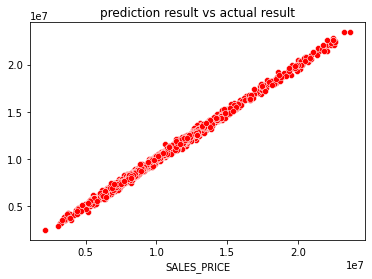

In [193]:
sns.scatterplot(x= y_test, y=XG_pred, color=["red"])
plt.title("prediction result vs actual result")
plt.show()

In [194]:
from sklearn import metrics
XG1 = metrics.r2_score(y_test,XG_pred)
print('R2- SCORE FOR XG-BOOST MODEL:', round((XG1*100),2),"%")

R2- SCORE FOR XG-BOOST MODEL: 99.64 %


<Figure size 1080x720 with 0 Axes>

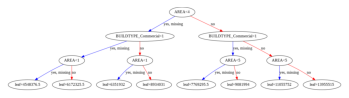

In [195]:
from xgboost import plot_tree
plt.figure(figsize=(15,10))
plot_tree(xg_model)

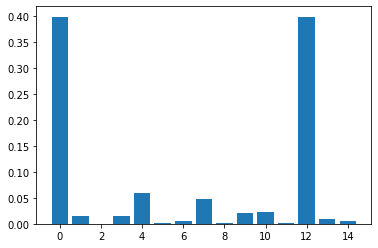

In [196]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

# **FINDING THE BEST MODEL:**




In [197]:
print("R2 SCORE FOR ALL MODELS:")
print()
print('R2- SCORE FOR LINEAR REGRESSION:', round((lr1*100),2),"%")
print('R2- SCORE FOR KNN MODEL:', round((KNN1*100),2),"%")
print('R2- SCORE FOR DECISION TREE MODEL:', round((dt1*100),2),"%")
print('R2- SCORE FOR RANDOM FOREST MODEL :', round((rf1*100),2),"%")
print('R2- SCORE FOR XG-BOOST MODEL:', round((XG1*100),2),"%")


R2 SCORE FOR ALL MODELS:

R2- SCORE FOR LINEAR REGRESSION: 92.91 %
R2- SCORE FOR KNN MODEL: 94.43 %
R2- SCORE FOR DECISION TREE MODEL: 97.24 %
R2- SCORE FOR RANDOM FOREST MODEL : 97.47 %
R2- SCORE FOR XG-BOOST MODEL: 99.64 %


In [198]:
r2={'R2_score':['LR', 'KNN', 'DT', 'RF',"XG"],
        'score':[92.91, 94.43, 97.15, 97.5,99.71]}
R2_df=pd.DataFrame(r2)
R2_df

,R2_score,score
0,LR,92.91
1,KNN,94.43
2,DT,97.15
3,RF,97.50
4,XG,99.71


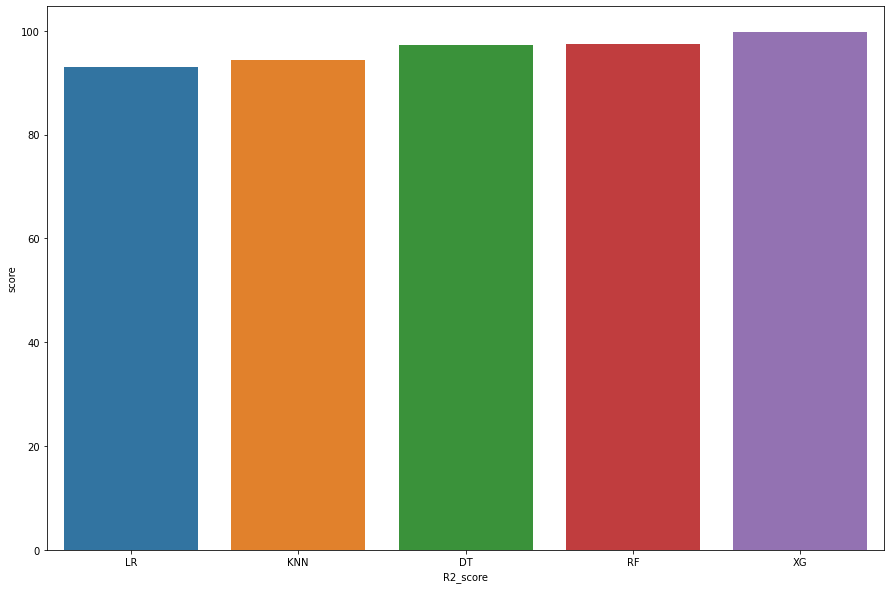

In [199]:
plt.figure(figsize=(15,10))
sns.barplot(x=R2_df.R2_score,y=R2_df.score)

# **FEATURE IMPORTANCE:**

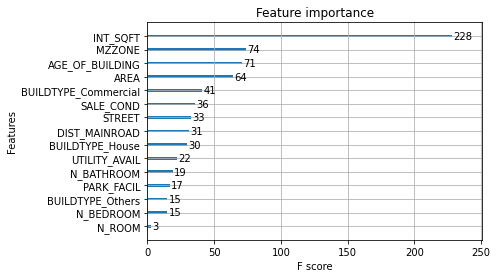

In [200]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()

In [201]:
print(model.feature_importances_)

[3.9717671e-01 1.5197231e-02 1.7332559e-04 1.5317896e-02 5.9239279e-02
 9.7423687e-04 5.3051575e-03 4.7019269e-02 1.6575330e-03 2.1521408e-02
 2.1740286e-02 1.9916268e-03 3.9840916e-01 8.7630227e-03 5.5138064e-03]


In [202]:
feature_scores = pd.Series(model.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_scores = feature_scores*100
feature_scores

BUILDTYPE_Commercial    39.840916
AREA                    39.717670
N_BATHROOM               5.923928
PARK_FACIL               4.701927
MZZONE                   2.174029
STREET                   2.152141
N_BEDROOM                1.531790
INT_SQFT                 1.519723
BUILDTYPE_House          0.876302
BUILDTYPE_Others         0.551381
SALE_COND                0.530516
AGE_OF_BUILDING          0.199163
UTILITY_AVAIL            0.165753
N_ROOM                   0.097424
DIST_MAINROAD            0.017333
dtype: float32

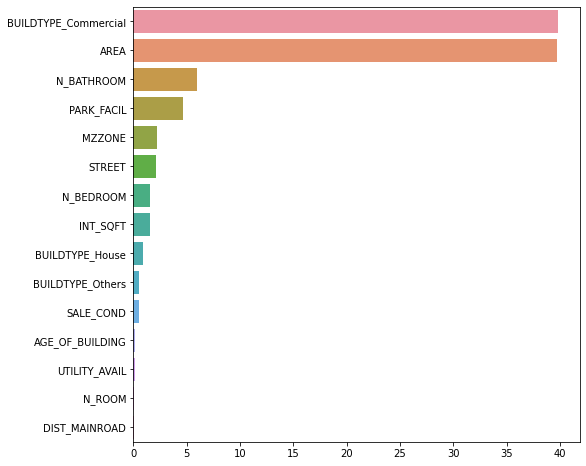

In [203]:
plt.figure(figsize=(8,8))
sns.barplot(x=feature_scores,y=feature_scores.index)

In [204]:
main_features=feature_scores.loc[feature_scores >1]
main_features

BUILDTYPE_Commercial    39.840916
AREA                    39.717670
N_BATHROOM               5.923928
PARK_FACIL               4.701927
MZZONE                   2.174029
STREET                   2.152141
N_BEDROOM                1.531790
INT_SQFT                 1.519723
dtype: float32

**OBSERVATIONS:**

THESE ARE THE FEATURES MORE IMPORTANTLY IMPACTING OUR XG BOOST MODEL RESULTS.



1. BUILDTYPE_Commercial    40.700150
2. AREA                    37.157658
3. INT_SQFT                 4.126828
4. MZZONE                   3.865907
5. STREET                   3.694559
6. PARK_FACIL               3.031277
7. BUILDTYPE_House          2.770039
8. N_BEDROOM                1.643945

In [205]:
score=[40.700150, 37.157658, 4.126828, 3.865907,3.694559,3.031277,2.770039,1.643945]
features=['BUILDTYPE_Commercial', 'AREA', 'INT_SQFT', 'MZZONE',"STREET","PARK_FACIL","BUILDTYPE_House","N_BEDROOM"]

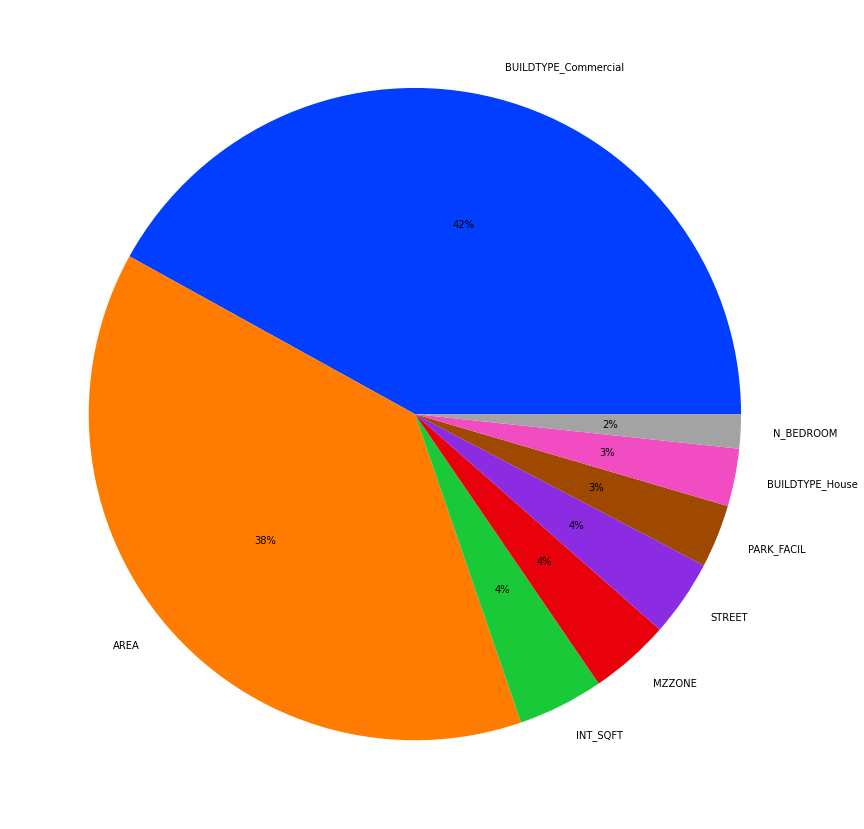

In [206]:
plt.figure(figsize=(15,15))
colors = sns.color_palette('bright')
plt.pie(score, labels=features,colors = colors, autopct = '%0.0f%%')
plt.show()